# Displaying point sets (3-D)

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cvxopt
from cvxopt import matrix, printing

In [81]:
X = np.loadtxt('bunny.txt')
# synthetic data, a small translation
Y = X + .05

# Displaying the coordinates of the first 10 vertices
X[0:10,0:10]

array([[-0.0312216 ,  0.126304  ,  0.00514924],
       [-0.0446774 ,  0.13120399,  0.00570479],
       [-0.0683011 ,  0.14482801,  0.0413688 ],
       [-0.00600095,  0.13039801,  0.0178986 ],
       [-0.0173568 ,  0.12761299,  0.00526885],
       [ 0.0330513 ,  0.107034  ,  0.0319543 ],
       [ 0.0400873 ,  0.10521   ,  0.0173419 ],
       [-0.0301802 ,  0.106322  ,  0.0399745 ],
       [ 0.0304193 ,  0.118572  ,  0.0188068 ],
       [-0.0640822 ,  0.159391  , -0.0169096 ]])

In [82]:
def visualize3D(X, Y, ax):
    plt.cla()
    ax.scatter(X[:, 0],  X[:, 1], X[:, 2], color='blue', label='Original')
    ax.scatter(Y[:, 0],  Y[:, 1], Y[:, 2], color='red', label='Transformed')
    ax.legend(loc='upper left', fontsize='x-large')
    ax.grid(False)
    ax.set_xlabel('x') 
    ax.set_ylabel('y') 
    ax.set_zlabel('z') 
    plt.draw()

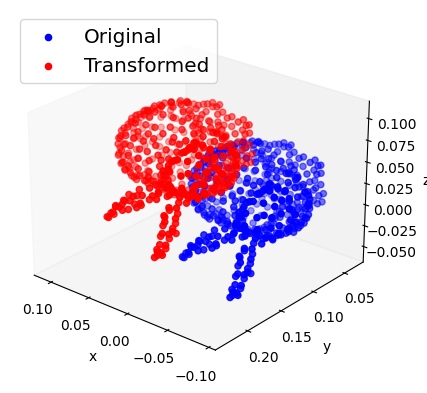

In [83]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
visualize3D(X, Y, ax=ax)
ax.view_init(25, 130, 0) 
plt.show()
